<a href="https://colab.research.google.com/github/sunilbabu07/netflix_analysis/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Problem Statement**


*   To analyze the basic metrics of the company's content library and identify areas of improvement and growth opportunities. This includes understanding the distribution of content across genres, types (movies and TV shows), release years, and other relevant factors.

**Basic metrics to analyze**

*   Genre distribution


*   Type distribution (Movies vs. TV Shows)


*   Release year analysis


*   Geographic distribution

*   Director and cast analysis














# **Importing required libraries**

In [244]:
!pip install gdown

In [245]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gdown

# **`Importing the dataset`**

In [246]:
drive_url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
output = 'netflix.csv'  # Output file name
gdown.download(drive_url, output, quiet=False)

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100%|██████████| 3.40M/3.40M [00:00<00:00, 54.7MB/s]


'netflix.csv'

In [247]:
df = pd.read_csv(output)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Observation on dataset**

In [248]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [249]:
# Shape of Data
print(df.shape)

(8807, 12)


In [250]:
# Data types of attributes
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [251]:
#number of unique values in our data
for column in df.columns:
  print(column,':',df[column].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [252]:
# Missing Value Detection
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [253]:
# Statistical Summary
numeric_attributes = ['release_year', 'duration']
categorical_attributes = ['type', 'country', 'rating']

In [254]:
numeric_summary = df[numeric_attributes].describe()
print(numeric_summary)

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


**Business Insight based on release year:**

* The mean release year of 2014 suggests that the dataset predominantly consists of movies released in recent years. This indicates a focus on more contemporary films.

*   The relatively low standard deviation of 8.819312 suggests that the release years of movies in the dataset are relatively stable and not widely spread. This could indicate consistency in the movie industry or a particular period of focus.








In [255]:
for column in categorical_attributes:
    frequency = df[column].value_counts()
    print(f"Frequency distribution for {column}:")
    print(frequency)
    print()

Frequency distribution for type:
Movie      6131
TV Show    2676
Name: type, dtype: int64

Frequency distribution for country:
United States                                                                                                                  2818
India                                                                                                                           972
United Kingdom                                                                                                                  419
Japan                                                                                                                           245
South Korea                                                                                                                     199
Canada                                                                                                                          181
Spain                                                                            

# **Non-Graphical Analysis**

In [256]:
# Unnesting the director, cast, country, listed_in column, i.e- creating separate lines for each of them based on title

df_unnested1 = df.copy()
df_unnested1['director'] = df_unnested1['director'].str.split(', ')
df_new1 = df_unnested1.explode('director')[['title', 'director']]

df_unnested2 = df.copy()
df_unnested2['cast'] = df_unnested2['cast'].str.split(',')
df_new2 =df_unnested2.explode('cast')[['title', 'cast']]

df_unnested3 = df.copy()
df_unnested3['country'] = df_unnested3['country'].str.split(',')
df_new3 = df_unnested3.explode('country')[['title', 'country']]

df_unnested4 = df.copy()
df_unnested4['listed_in'] = df_unnested4['listed_in'].str.split(',')
df_new4 = df_unnested4.explode('listed_in')[['title', 'listed_in']]

In [257]:
# Merging the unnested column along title

merged_df = pd.merge(df_new1, df_new2, on='title', suffixes=('_director', '_cast'))
merged_df = pd.merge(merged_df, df_new3, on='title', suffixes=('_merged', '_country'))
merged_df = pd.merge(merged_df, df_new4, on='title', suffixes=('_merged', '_listed_in'))
merged_df.head()

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,Documentaries
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows


In [258]:
# Replacing nan values in director, cast and country column

df_new = merged_df.fillna({'director': 'Unknown director', 'cast': 'Unknown actor', 'country': 'Unknown country'})
df_new.head()

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows


In [259]:
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [260]:
# renaming title and listed_in column

df_final.rename(columns={'title': 'movie name', 'listed_in': 'genres'}, inplace=True)
df_final.head()

,movie name,director,cast,country,genres,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [261]:
#now checking nulls

df_final.isnull().sum()

movie name        0
director          0
cast              0
country           0
genres            0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [262]:
# Impute missing values in 'date_added' based on release year

for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)
df_final.isnull().sum()

movie name       0
director         0
cast             0
country          0
genres           0
show_id          0
type             0
date_added       0
release_year     0
rating          67
duration         3
dtype: int64

In [263]:
# Replace null values in 'duration' with corresponding values from 'rating'

df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'

In [264]:
# Replace null values in 'ratings' with 'NR'

df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
pd.set_option('display.max_rows',None)

In [265]:
#now checking nulls
df_final.isnull().sum()

movie name      0
director        0
cast            0
country         0
genres          0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [266]:
df_final['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [267]:
#removing mins from data

df_final['duration']=df_final['duration'].str.replace(" min","")

df_final['dur_copy']=df_final['duration'].copy()
df_fin=df_final.copy()

# Replace 'Season' with 0

df_fin.loc[df_fin['dur_copy'].str.contains('Season'), 'dur_copy'] = 0
df_fin['dur_copy'] = df_fin['dur_copy'].replace('NR', 0)
df_fin['dur_copy'] = df_fin['dur_copy'].astype(int)
df_fin.head()



,movie name,director,cast,country,genres,show_id,type,date_added,release_year,rating,duration,dur_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [268]:
df_fin['dur_copy'].describe()

count    202065.000000
mean         77.152065
std          52.262613
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: dur_copy, dtype: float64

**Business insight:**



*   The average duration is approximately 77.15. This gives you an idea of the typical duration of the movies or TV shows in your dataset.

*   The standard deviation of 52.26 suggests that the duration values are spread out or dispersed around the mean. There is a significant amount of variation in the duration values.




In [269]:
# To impute missing values in the 'date_added' column based on the release year

mode_by_year = df_fin.groupby('release_year')['date_added'].agg(lambda x: x.mode().values[0] if not x.isnull().all() else np.nan)
df_fin['date_added'] = df_fin.apply(lambda row: mode_by_year[row['release_year']] if pd.isnull(row['date_added']) else row['date_added'], axis=1)

# Explore the 'date_added' attribute

df_fin['date_added'] = pd.to_datetime(df_fin['date_added'])
df_fin['year_added'] = df_fin['date_added'].dt.year
df_fin['year_added'].tail(10)


202055    2019
202056    2019
202057    2019
202058    2019
202059    2019
202060    2019
202061    2019
202062    2019
202063    2019
202064    2019
Name: year_added, dtype: int64

In [270]:
# Unique attributes in 'genres'

unique_genres = df_fin['genres'].unique()
print(unique_genres)

['Documentaries' 'International TV Shows' ' TV Dramas' ' TV Mysteries'
 'Crime TV Shows' ' International TV Shows' ' TV Action & Adventure'
 'Docuseries' ' Reality TV' ' Romantic TV Shows' ' TV Comedies'
 'TV Dramas' ' TV Horror' 'Children & Family Movies' 'Dramas'
 ' Independent Movies' ' International Movies' 'British TV Shows'
 'Comedies' ' Dramas' ' Docuseries' ' Comedies' ' Crime TV Shows'
 'TV Comedies' ' Spanish-Language TV Shows' 'Thrillers' ' Romantic Movies'
 ' Music & Musicals' 'Horror Movies' ' Sci-Fi & Fantasy' ' TV Thrillers'
 "Kids' TV" ' Thrillers' 'Action & Adventure' ' TV Sci-Fi & Fantasy'
 ' Classic Movies' ' Horror Movies' ' Anime Features' 'Reality TV'
 ' Sports Movies' 'Anime Series' " Kids' TV" 'International Movies'
 ' Korean TV Shows' 'Sci-Fi & Fantasy' ' Science & Nature TV'
 ' Teen TV Shows' ' Cult Movies' 'Classic Movies' 'TV Shows'
 ' Children & Family Movies' ' Faith & Spirituality' ' LGBTQ Movies'
 'Stand-Up Comedy' 'TV Action & Adventure' 'Movies'
 'Stan

In [271]:
# number of unique titles within each genre

df_fin.groupby('genres').agg({"movie name":"nunique"})

,movie name
genres,
Anime Features,50
Children & Family Movies,36
Classic & Cult TV,6
Classic Movies,36
Comedies,464
Crime TV Shows,71
Cult Movies,59
Documentaries,40
Docuseries,174


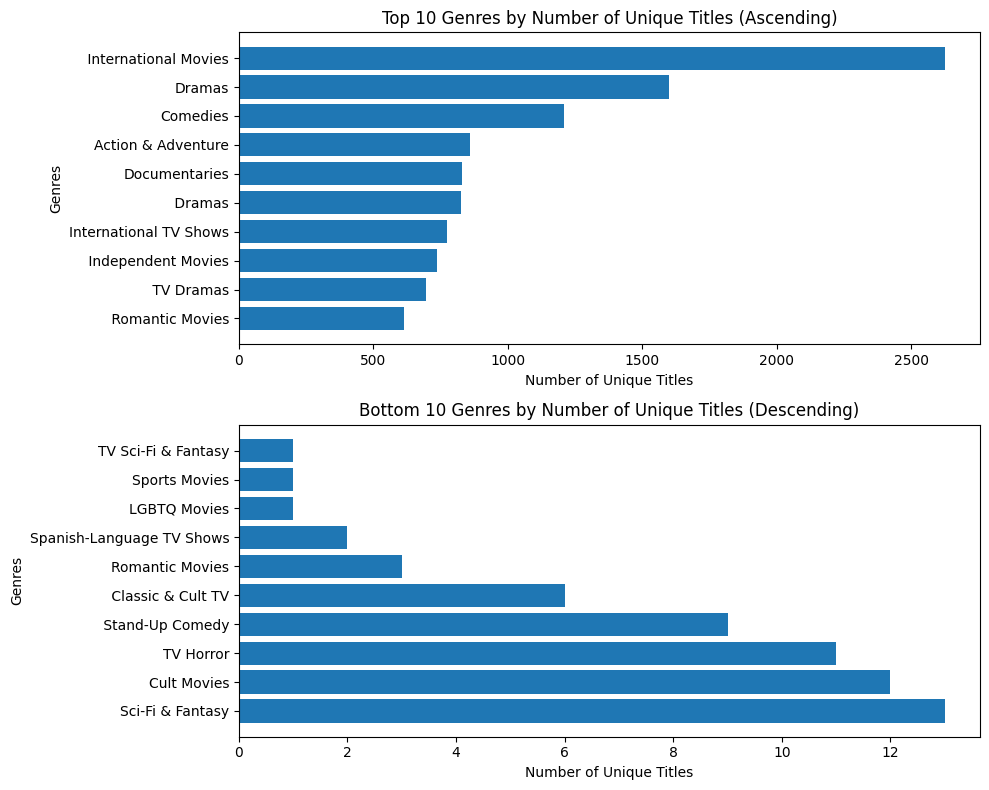

In [272]:
# bar plot for number of unique titles within each genre

top_10_genres = df_fin.groupby('genres').agg({"movie name":"nunique"}).nlargest(10, 'movie name').sort_values('movie name', ascending=True)
bottom_10_genres = df_fin.groupby('genres').agg({"movie name":"nunique"}).nsmallest(10, 'movie name').sort_values('movie name', ascending=False)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.barh(top_10_genres.index, top_10_genres['movie name'])
plt.xlabel('Number of Unique Titles')
plt.ylabel('Genres')
plt.title('Top 10 Genres by Number of Unique Titles (Ascending)')

plt.subplot(2, 1, 2)
plt.barh(bottom_10_genres.index, bottom_10_genres['movie name'])
plt.xlabel('Number of Unique Titles')
plt.ylabel('Genres')
plt.title('Bottom 10 Genres by Number of Unique Titles (Descending)')

plt.tight_layout()
plt.show()

**Business insights:**


*   International movies are popular genres with a large number of unique titles. This suggests a strong demand for thought-provoking and culturally diverse content.


*   Dramas and Stand-Up Comedy is also popular, indicating a significant interest in comedy specials and performances.


*   The presence of various sub-genres within the bottom 10 suggests a diverse range of preferences among viewers.





In [273]:
# Value counts for 'genres' attribute

genres_counts = df_fin['genres'].value_counts()
print("Popular genres:")
print(genres_counts.head(10))

Popular genres:
 International Movies       27141
Dramas                      19657
Comedies                    13894
Action & Adventure          12216
 Dramas                     10149
 Independent Movies          9564
Children & Family Movies     9294
 TV Dramas                   7956
International TV Shows       7065
 Comedies                    6935
Name: genres, dtype: int64


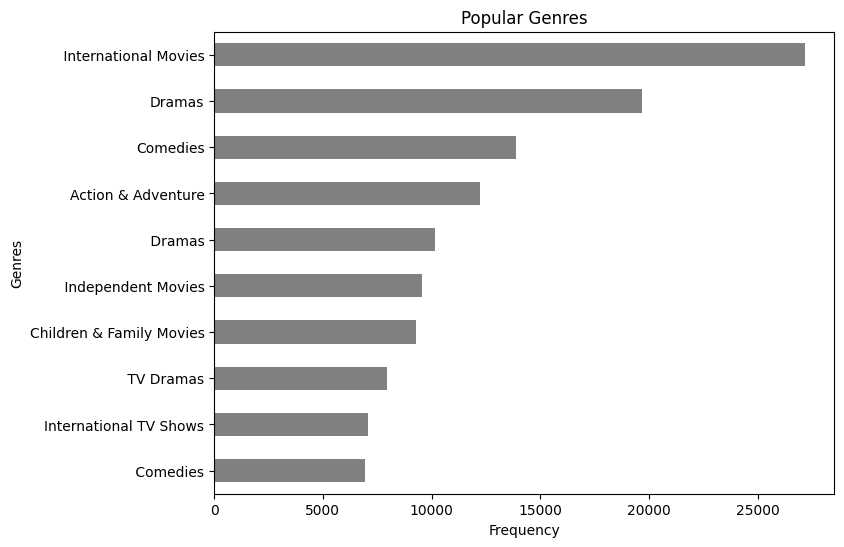

In [274]:
# bar plot for value counts for 'genres'

plt.figure(figsize=(8, 6))
genres_counts.head(10).sort_values().plot(kind='barh', color='Grey')
plt.title('Popular Genres')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.show()

**Business insights on popular genres**

*   These insights can be valuable for content creators, streaming platforms, and marketers to understand the preferences and trends in the entertainment industry and tailor their offerings to cater to the audience's interests.

In [275]:
# Value counts for 'type' attribute

type_counts = df_fin['type'].value_counts()
print("Value counts for 'type' attribute:")
print(type_counts)

Value counts for 'type' attribute:
Movie      145917
TV Show     56148
Name: type, dtype: int64


In [276]:
# number of distinct movie name on the basis of type

df_fin.groupby(['type']).agg({"movie name":"nunique"})

,movie name
type,
Movie,6131
TV Show,2676


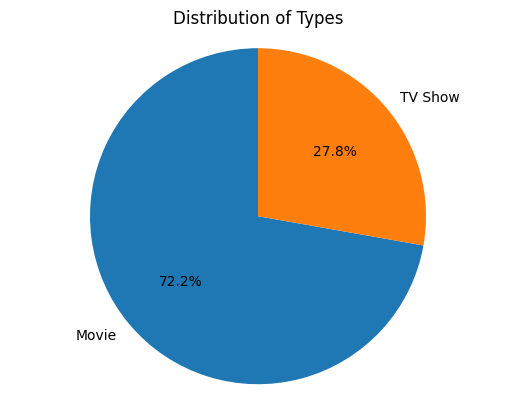

In [277]:
# Create a pie chart for 'type' attribute

plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Types')
plt.axis('equal')

# Show the plot
plt.show()

**Business insights:**


*   There are 6,131 entries in the dataset that are classified as movies. This suggests that movies are a popular category within the dataset. It could indicate that there is a significant demand for movies among the target audience.

*   There are 2,676 entries in the dataset that are classified as TV shows. This indicates that TV shows also have a considerable presence within the dataset. It suggests that TV shows are a significant category of content available on the platform.




In [278]:
# Remove leading/trailing whitespaces in the 'country' column

df_fin['country'] = df_fin['country'].str.strip()
df_fin['country'] = df_fin['country'].str.replace(',', '')


In [279]:
# Unique attributes for 'country' attribute

unique_countries = df_fin['country'].value_counts()
print("Unique attributes for 'country' attribute:")
print(unique_countries.head(10))

Unique attributes for 'country' attribute:
United States      59350
India              22814
United Kingdom     12965
Unknown country    11897
Japan               8679
France              8254
Canada              7915
Spain               5315
South Korea         5043
Germany             4383
Name: country, dtype: int64


In [280]:
# number of unique titles within each genre

df_fin.groupby('country').agg({"movie name":"nunique"})

,movie name
country,
,7
Afghanistan,1
Albania,1
Algeria,3
Angola,1
Argentina,91
Armenia,1
Australia,160
Austria,12


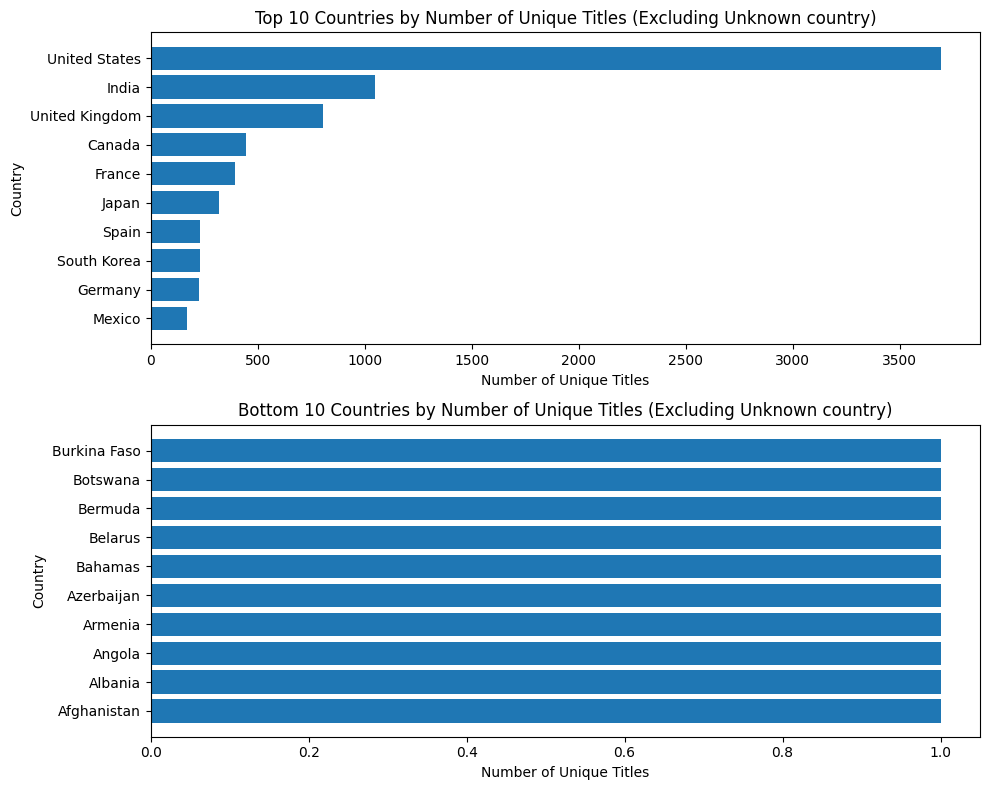

In [281]:
# bar plot for number of unique titles based on country

top_10_country = df_fin[df_fin['country'] != 'Unknown country'].groupby('country').agg({"movie name":"nunique"}).nlargest(10, 'movie name')
bottom_10_country = df_fin[df_fin['country'] != 'Unknown country'].groupby('country').agg({"movie name":"nunique"}).nsmallest(10, 'movie name')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
top_10_country = top_10_country.sort_values('movie name', ascending=True)  # Sort in ascending order
plt.barh(top_10_country.index, top_10_country['movie name'])
plt.xlabel('Number of Unique Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Unique Titles (Excluding Unknown country)')

plt.subplot(2, 1, 2)
bottom_10_country = bottom_10_country.sort_values('movie name', ascending=True)  # Sort in ascending order
plt.barh(bottom_10_country.index, bottom_10_country['movie name'])
plt.xlabel('Number of Unique Titles')
plt.ylabel('Country')
plt.title('Bottom 10 Countries by Number of Unique Titles (Excluding Unknown country)')

plt.tight_layout()
plt.show()


**Business insights:**



*   These data can be useful for streaming platforms to understand the regional preferences of their audience and make informed decisions regarding content acquisition and licensing. It can also help them cater to specific audience segments and optimize their content library to meet the demands of different markets.



In [282]:
# Value counts for 'rating' attribute

rating_counts = df_fin['rating'].value_counts()
print("Value counts for 'rating' attribute:")
print(rating_counts)

Value counts for 'rating' attribute:
TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64


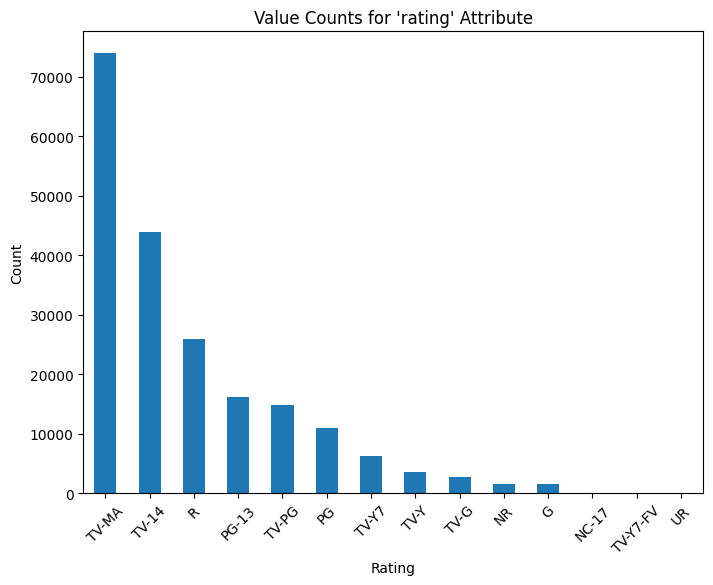

In [283]:
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.title("Value Counts for 'rating' Attribute")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

rating
G             41
NC-17          3
NR            87
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
Name: movie name, dtype: int64


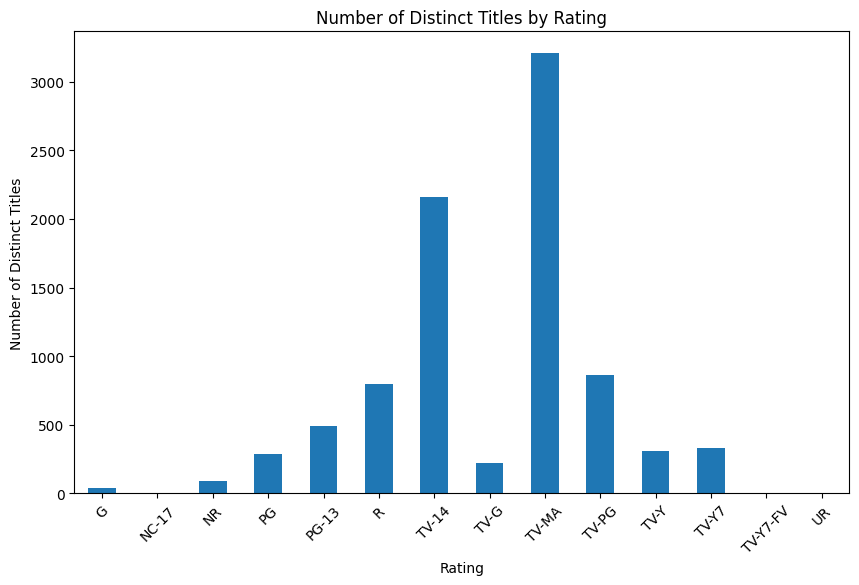

In [284]:
# number of distinct titles on the basis of rating

rating_counts = df_fin.groupby('rating')['movie name'].nunique()
print(rating_counts)

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Distinct Titles')
plt.title('Number of Distinct Titles by Rating')
plt.xticks(rotation=45)
plt.show()

**Business insights:**


*   The majority of titles fall under the TV-MA rating category, indicating that content with mature themes and intended for mature audiences is quite prevalent on the platform.
*   The TV-14 rating category also has a significant number of distinct titles, suggesting a substantial amount of content suitable for viewers aged 14 and above.

*   These insights can help inform content curation strategies, target audience segmentation, and decision-making related to content production and acquisition on the platform.





In [285]:
# Unique attributes for 'duration' attribute

unique_durations = df_fin['duration'].unique()
print(unique_durations)

['90' '2 Seasons' '1 Season' '91' '125' '9 Seasons' '104' '127'
 '4 Seasons' '67' '94' '5 Seasons' '161' '61' '166' '147' '103' '97' '106'
 '111' '3 Seasons' '110' '105' '96' '124' '116' '98' '23' '115' '122' '99'
 '88' '100' '6 Seasons' '102' '93' '95' '85' '83' '113' '13' '182' '48'
 '145' '87' '92' '80' '117' '128' '119' '143' '114' '118' '108' '63' '121'
 '142' '154' '120' '82' '109' '101' '86' '229' '76' '89' '156' '112' '107'
 '129' '135' '136' '165' '150' '133' '70' '84' '140' '78' '7 Seasons' '64'
 '59' '139' '69' '148' '189' '141' '130' '138' '81' '132' '10 Seasons'
 '123' '65' '68' '66' '62' '74' '131' '39' '46' '38' '8 Seasons'
 '17 Seasons' '126' '155' '159' '137' '12' '273' '36' '34' '77' '60' '49'
 '58' '72' '204' '212' '25' '73' '29' '47' '32' '35' '71' '149' '33' '15'
 '54' '224' '162' '37' '75' '79' '55' '158' '164' '173' '181' '185' '21'
 '24' '51' '151' '42' '22' '134' '177' '13 Seasons' '52' '14' '53' '8'
 '57' '28' '50' '9' '26' '45' '171' '27' '44' '146' '20' '157

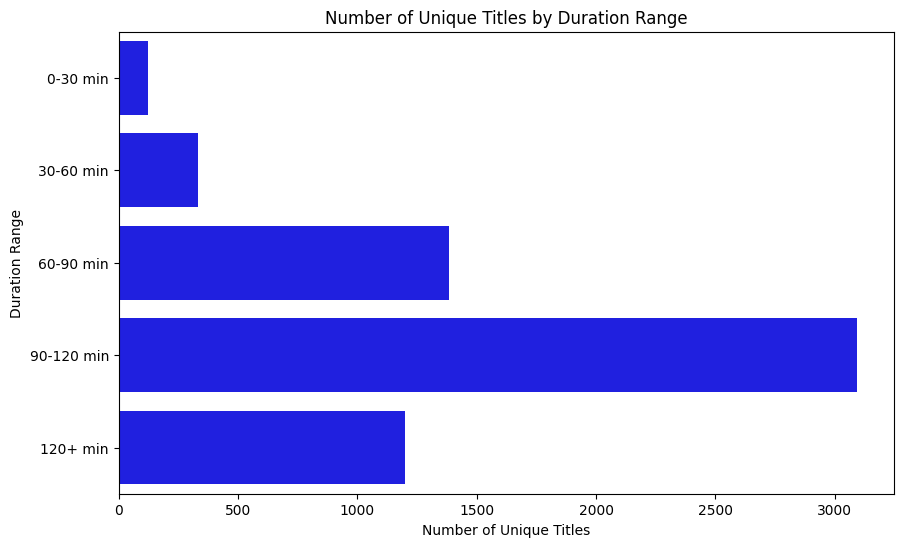

In [286]:
# Remove non-numeric values and convert 'duration' column to numeric
df_fin['duration'] = pd.to_numeric(df_fin['duration'], errors='coerce')

# Define the duration ranges
duration_ranges = [0, 30, 60, 90, 120, np.inf]
duration_labels = ['0-30 min', '30-60 min', '60-90 min', '90-120 min', '120+ min']

# Create a new column 'duration_range' with the duration ranges
df_fin['duration_range'] = pd.cut(df_fin['duration'], bins=duration_ranges, labels=duration_labels, right=False)

# Calculate the number of unique titles for each duration range
duration_counts = df_fin.groupby('duration_range')['movie name'].nunique()

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x=duration_counts, y=duration_counts.index, color='blue')
plt.xlabel('Number of Unique Titles')
plt.ylabel('Duration Range')
plt.title('Number of Unique Titles by Duration Range')
plt.show()


**Business insights:**

*   Most of the titles have a duration in the range of 90-120 minutes, indicating that this duration is popular among viewers.

*   There is a significant number of titles with a duration of 120+ minutes, suggesting a demand for longer movies or shows.
*  Titles with a duration of 0-30 minutes have the lowest count, indicating that shorter content is relatively less common.

*   The range of 60-90 minutes has a substantial number of titles, indicating a popular duration for movies or shows.
*   These insights can help content creators and streaming platforms understand audience preferences and tailor their offerings accordingly. They can focus on producing more content in the popular duration ranges and consider diversifying their offerings by including shorter or longer content to cater to different viewer preferences.

In [287]:
# Unique attributes for 'director' attribute
unique_directors = df_fin['director'].unique()
print(unique_directors)

['Kirsten Johnson' 'Unknown director' 'Julien Leclercq' ...
 'Majid Al Ansari' 'Peter Hewitt' 'Mozez Singh']


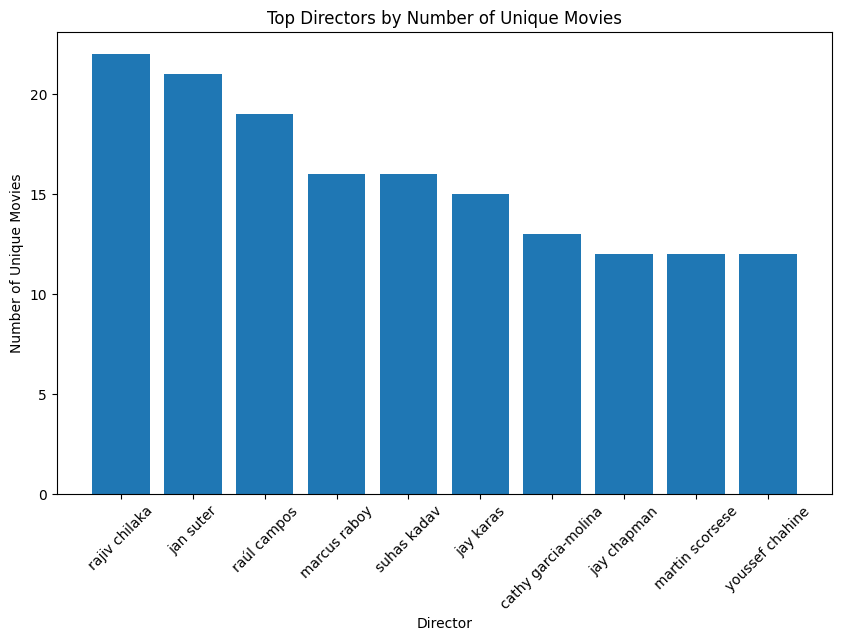

In [288]:
# Clean the director column by removing leading/trailing white spaces and converting to lowercase
df_fin['director_cleaned'] = df_fin['director'].str.strip().str.lower()

# Filter out rows where the director is "Unknown Director" or empty
top_directors = df_fin[(df_fin['director_cleaned'] != 'unknown director') & (df_fin['director_cleaned'] != '')].groupby('director_cleaned').agg({"movie name":"nunique"}).nlargest(10, 'movie name')

# Plotting a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_directors.index, top_directors['movie name'])
plt.xlabel('Director')
plt.ylabel('Number of Unique Movies')
plt.title('Top Directors by Number of Unique Movies')
plt.xticks(rotation=45)
plt.show()


**Business insights:**



*   These directors have directed a significant number of unique movies. Their work and contributions to the film industry may have had a notable impact.










In [289]:
# unique cast

unique_cast = df_fin['cast'].unique()
print(unique_cast)

['Unknown actor' 'Ama Qamata' ' Khosi Ngema' ... ' Malkeet Rauni'
 ' Anita Shabdish' ' Chittaranjan Tripathy']


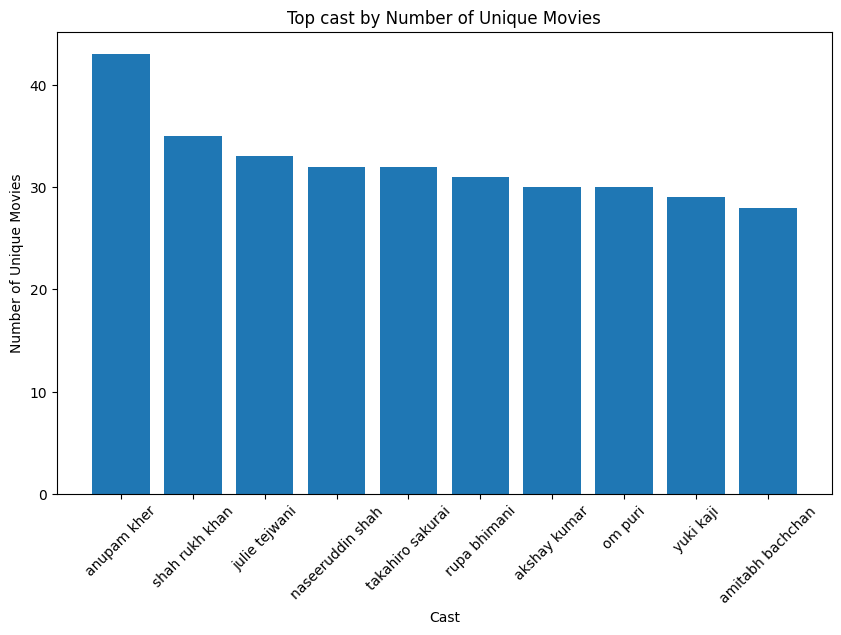

In [290]:
# Clean the cast column by removing leading/trailing white spaces and converting to lowercase

df_fin['cast_cleaned'] = df_fin['cast'].str.strip().str.lower()

# Filter out rows where the cast is "Unknown actor" or empty
top_cast = df_fin[(df_fin['cast_cleaned'] != 'unknown actor') & (df_fin['cast_cleaned'] != '')].groupby('cast_cleaned').agg({"movie name":"nunique"}).nlargest(10, 'movie name')

# Plotting a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_cast.index, top_cast['movie name'])
plt.xlabel('Cast')
plt.ylabel('Number of Unique Movies')
plt.title('Top cast by Number of Unique Movies')
plt.xticks(rotation=45)
plt.show()

**Business insight:**

*   These actors have appeared in a significant number of unique movies, indicating their popularity and frequent involvement in the film industry. Their performances and contributions to the movies they have appeared in may have garnered attention and success.


In [291]:
# Unique attributes for 'date_added' attribute

unique_dates_added = df_fin['date_added'].unique()
print(unique_dates_added)

['2021-09-25T00:00:00.000000000' '2021-09-24T00:00:00.000000000'
 '2021-09-23T00:00:00.000000000' ... '2018-12-06T00:00:00.000000000'
 '2016-03-09T00:00:00.000000000' '2020-01-11T00:00:00.000000000']


<ipython-input-292-12991bd61d0f>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_fin['week_added'] = df_fin['date_added'].dt.week


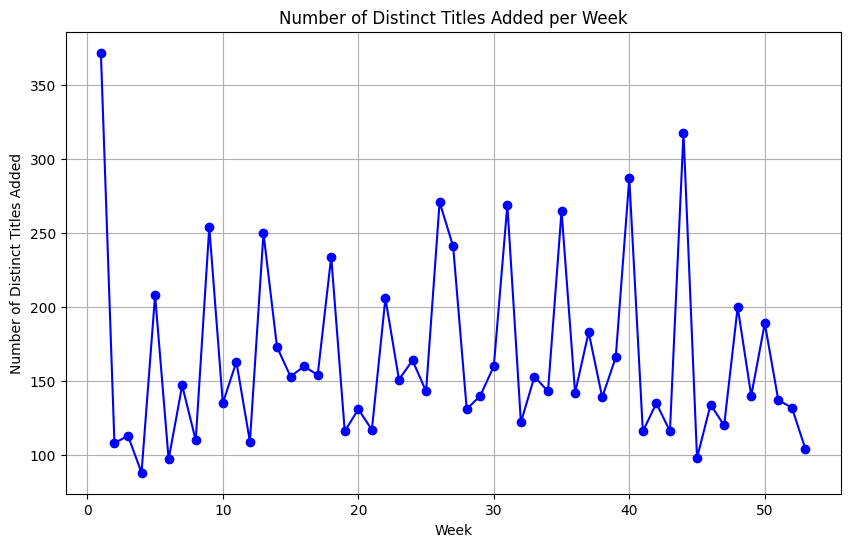

In [292]:
# Convert the 'date_added' column to datetime format if it is not already in datetime format

df_fin['date_added'] = pd.to_datetime(df_fin['date_added'])

# Create a new column 'week_added' to extract the week number from the 'date_added' column

df_fin['week_added'] = df_fin['date_added'].dt.week

# Group the data by 'week_added' and count the number of unique titles

week_counts = df_fin.groupby('week_added')['movie name'].nunique()

# Plot the graph

plt.figure(figsize=(10, 6))
plt.plot(week_counts.index, week_counts.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Week')
plt.ylabel('Number of Distinct Titles Added')
plt.title('Number of Distinct Titles Added per Week')
plt.grid(True)
plt.show()


**Business insights:**


*   These analysis can help in understanding the trends and patterns of content addition over different weeks, which can be useful for content planning and analysis in the streaming platform.

*   It seems that there is a concentration of content being added in the first week of the year, followed by a cyclical pattern.





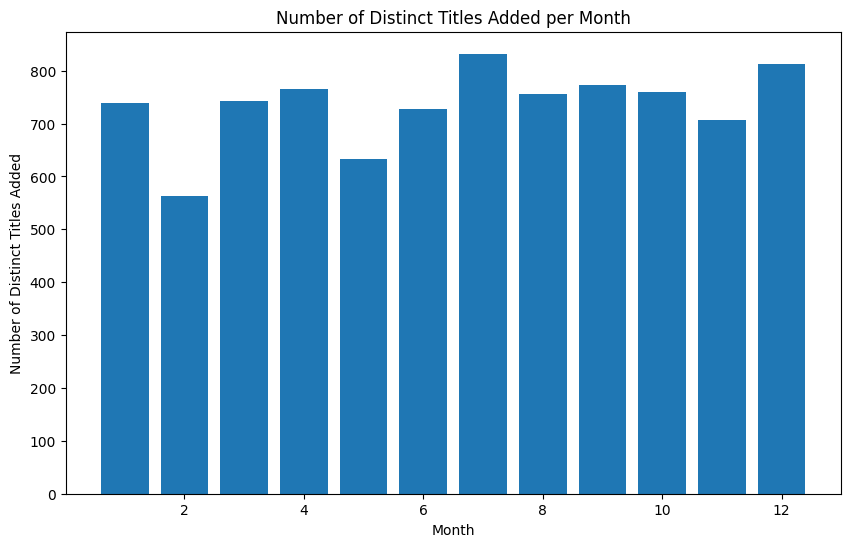

In [293]:
# Convert the 'date_added' column to datetime format if it is not already in datetime format
df_fin['date_added'] = pd.to_datetime(df_fin['date_added'])

# Create a new column 'month_added' to extract the month from the 'date_added' column
df_fin['month_added'] = df_fin['date_added'].dt.month

# Group the data by 'month_added' and count the number of unique titles
month_counts = df_fin.groupby('month_added')['movie name'].nunique()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Distinct Titles Added')
plt.title('Number of Distinct Titles Added per Month')
plt.show()

**Business insights:**



*  It appears that Netflix focuses on releasing a substantial amount of content during the summer months, as indicated by the high number of titles added in July.



In [294]:
# Unique attributes for 'release_year' attribute

unique_release_years = df_fin['release_year'].unique()
print(unique_release_years)

[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]


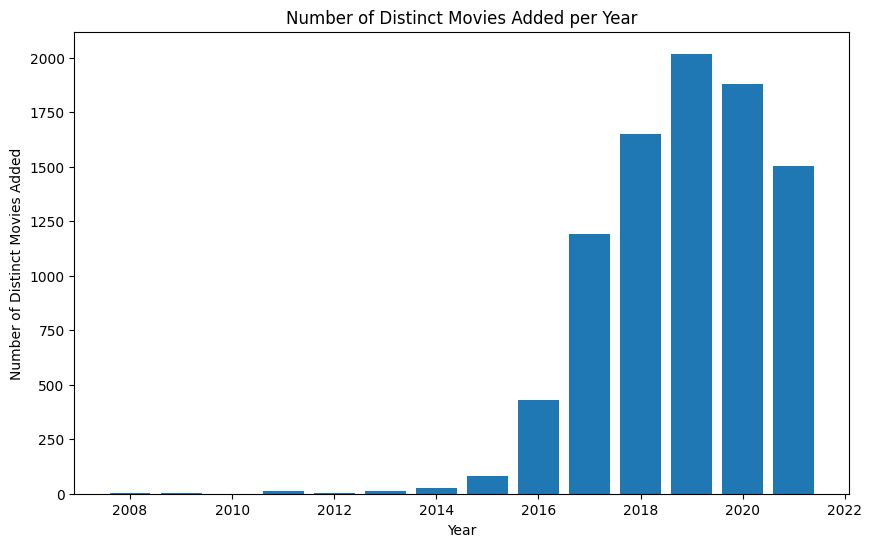

In [295]:
# Convert the 'date_added' column to datetime format if it is not already in datetime format
df_fin['date_added'] = pd.to_datetime(df_fin['date_added'])

# Create a new column 'year_added' to extract the year from the 'date_added' column
df_fin['year_added'] = df_fin['date_added'].dt.year

# Group the data by 'year_added' and count the number of unique titles
year_counts = df_fin.groupby('year_added')['movie name'].nunique()

# Fill in missing years with zero counts
all_years = range(df_fin['year_added'].min(), df_fin['year_added'].max() + 1)
year_counts = year_counts.reindex(all_years, fill_value=0)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Distinct Movies Added')
plt.title('Number of Distinct Movies Added per Year')
plt.show()

**Business insights:**



*   The number of distinct titles added per year started increasing significantly from 2015 onwards, with a notable spike in 2016.


*   The highest number of distinct titles added was in the year 2019, with a total of 2,018 titles.


*   The years 2017, 2018, 2020, and 2021 also witnessed a substantial number of distinct titles being added.








<ipython-input-296-bc81424666e4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_fin.corr()


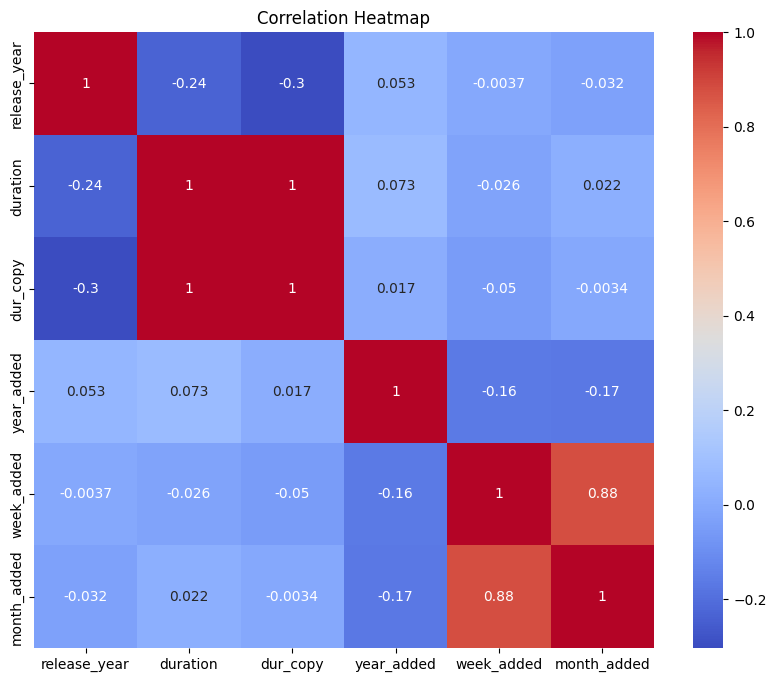

In [296]:
# Correlation analysis

correlation_matrix = df_fin.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [297]:
# Unique attributes for 'title' attribute
unique_titles = df_fin['movie name'].unique()
print("Unique attributes for 'title' attribute:")
print(unique_titles)

Unique attributes for 'title' attribute:
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']


# **Comparison of Movie vs TV show**

In [298]:
# Group the data by 'release_year' and 'type', and calculate the cumulative sum of counts

cumulative_counts = df_fin.groupby(['release_year', 'type']).size().unstack().cumsum()
print(cumulative_counts.tail(10))


type             Movie  TV Show
release_year                   
2012           47974.0   6176.0
2013           54496.0   7399.0
2014           62140.0   8853.0
2015           72752.0  12369.0
2016           86827.0  16759.0
2017          101896.0  22206.0
2018          118956.0  29587.0
2019          130882.0  39592.0
2020          140490.0  49681.0
2021          145917.0  56148.0


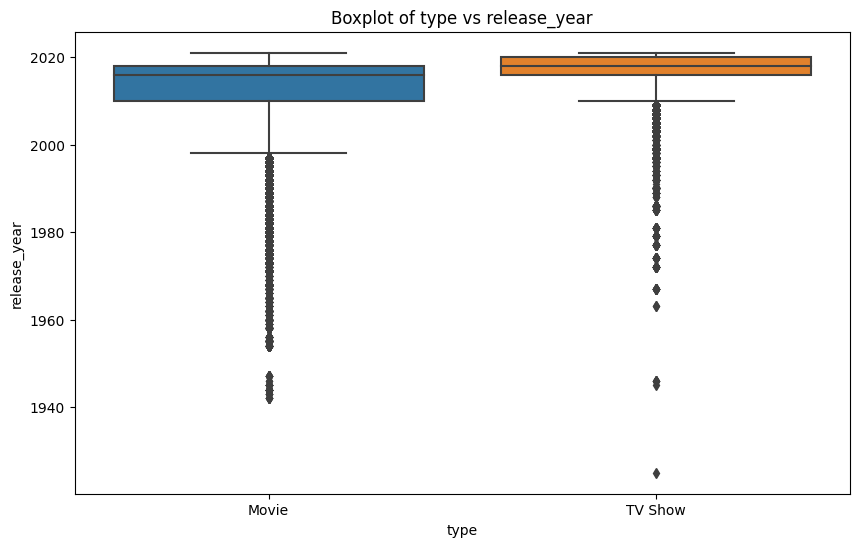

In [299]:
# Boxplot for categorical variables 'type'

categorical_vars = ['type']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_fin, x=var, y='release_year')
    plt.title(f'Boxplot of {var} vs release_year')
    plt.show()


**Business insights:**



*   The number of movie releases has been consistently higher than TV shows throughout the years.

*   The year 2021 has seen a significant increase in the number of releases, with a higher growth rate for TV shows compared to movies.



In [300]:
# Group the data by 'release_year', 'type' and ''rating, and calculate the cumulative sum of counts

cumulative_counts = df_fin.groupby(['release_year', 'type','rating']).size().unstack().cumsum()
print(cumulative_counts.tail(10))

rating                     G  NC-17      NR       PG    PG-13        R  \
release_year type                                                        
2017         Movie    1326.0    NaN  1623.0   8752.0  13831.0  22196.0   
             TV Show     NaN    NaN     NaN      NaN      NaN      NaN   
2018         Movie    1428.0  149.0  1643.0   9867.0  15180.0  23675.0   
             TV Show     NaN    NaN     NaN      NaN      NaN      NaN   
2019         Movie    1528.0    NaN     NaN  10289.0  15584.0  24706.0   
             TV Show     NaN    NaN     NaN      NaN      NaN      NaN   
2020         Movie    1530.0    NaN     NaN  10598.0  16003.0  25500.0   
             TV Show     NaN    NaN     NaN      NaN      NaN      NaN   
2021         Movie       NaN    NaN     NaN  10919.0  16246.0  25860.0   
             TV Show     NaN    NaN     NaN      NaN      NaN      NaN   

rating                  TV-14    TV-G    TV-MA    TV-PG    TV-Y   TV-Y7  \
release_year type                   

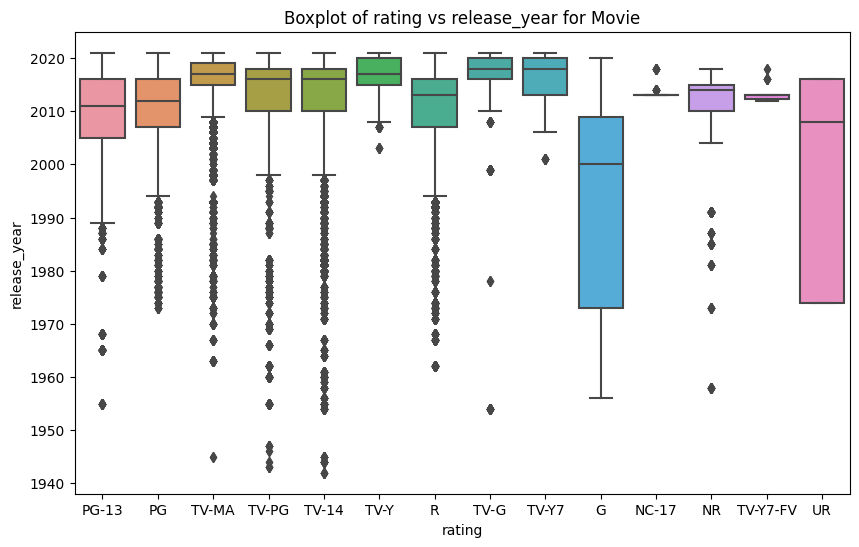

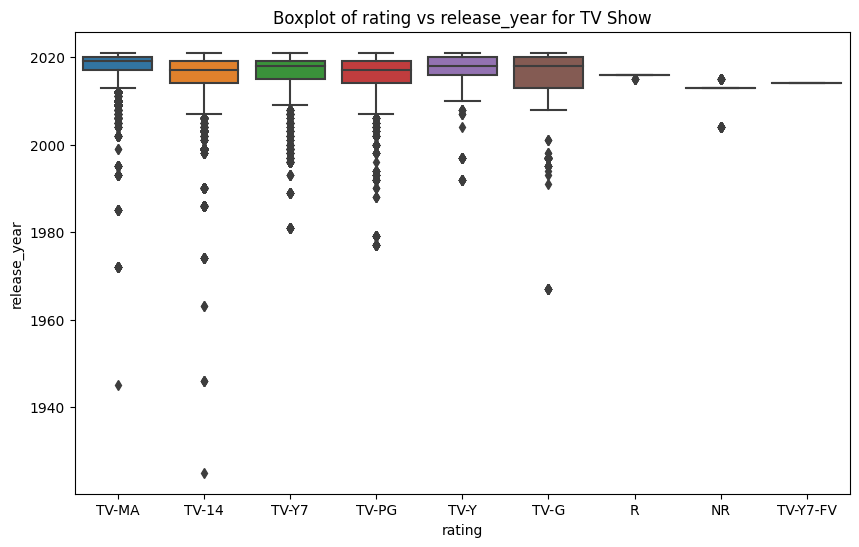

In [301]:
# Boxplot for categorical variables 'rating'

categorical_var = 'rating'
group_by_var = 'type'

for group_name, group_data in df_fin.groupby(group_by_var):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=group_data, x=categorical_var, y='release_year')
    plt.title(f'Boxplot of {categorical_var} vs release_year for {group_name}')
    plt.show()


**Business insight**



*   These data can help understand the distribution of content ratings over the years and provide valuable information for content planning and audience targeting.

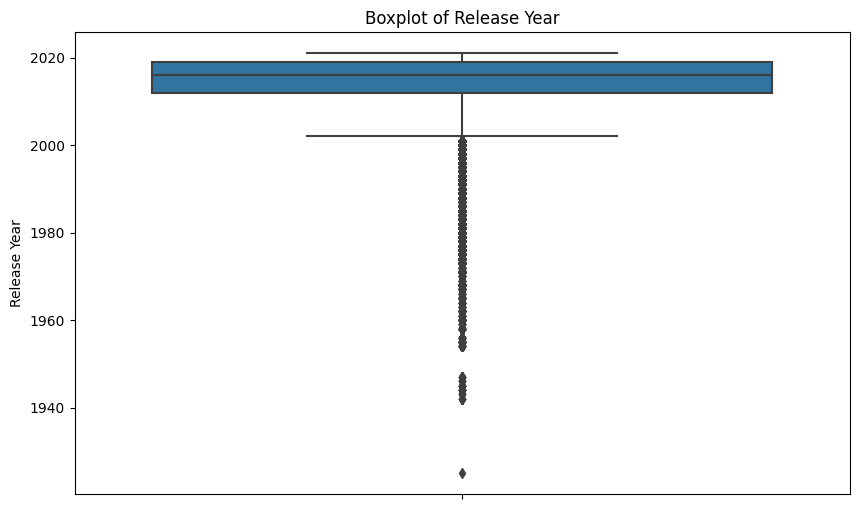

In [302]:
# Outlier Check

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fin, y='release_year')
plt.ylabel('Release Year')
plt.title('Boxplot of Release Year')
plt.show()


**Business insights:**

*   The presence of outliers or gaps in certain time periods can indicate areas where there might be fewer movies or TV shows available. This insight can be used to identify potential gaps in content offerings or opportunities for acquiring or producing content to fill those gaps.



*   The distribution of release years can inform decisions related to content acquisition or production strategies. For example, if there is a significant concentration of movies or TV shows released in a particular time period, it may indicate a popular or successful era for certain genres or styles, which can guide content acquisition or production decisions.


*   Analyzing the distribution of release years can help track broader industry trends and developments. This information can be valuable for staying updated with the evolving landscape of the movie and TV show industry.






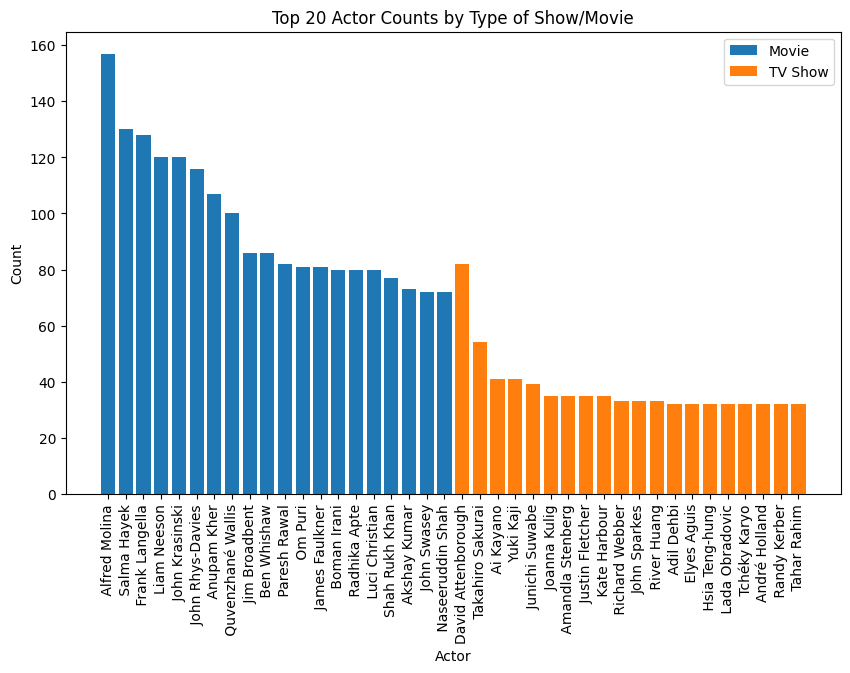

In [303]:
# Analysis of actors of different types of shows/movies.

# Group the data by 'type'

grouped_data = df_fin.groupby('type')

# Initialize an empty dictionary to store actor counts

actor_counts = {}

# Iterate over the groups

for group_name, group_data in grouped_data:
    # Split the 'cast' values and count the occurrences of each actor
    actors = group_data['cast'].str.split(', ').explode()
    # Exclude the 'unknown' actors
    actors = actors[actors != 'Unknown actor']
    actor_counts[group_name] = actors.value_counts().head(20)

# Plot the actor counts for each type of show/movie
plt.figure(figsize=(10, 6))
for group_name, actor_count in actor_counts.items():
    plt.bar(actor_count.index, actor_count.values, label=group_name)
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Top 20 Actor Counts by Type of Show/Movie')
plt.legend()
plt.xticks(rotation=90)
plt.show()


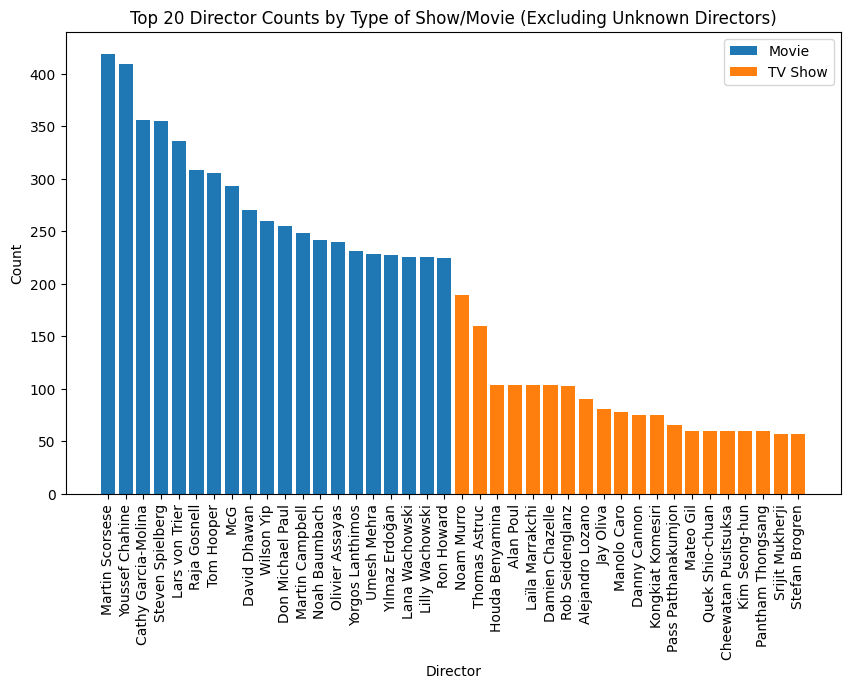

In [304]:
# Analysis of director of different types of shows/movies.

# Group the data by 'type'

grouped_data = df_fin.groupby('type')

# Initialize an empty dictionary to store director counts

director_counts = {}

# Iterate over the groups

for group_name, group_data in grouped_data:
    # Split the 'director' values and count the occurrences of each director
    directors = group_data['director'].str.split(', ').explode()
    # Exclude the 'unknown' directors
    directors = directors[directors != 'Unknown director']
    director_counts[group_name] = directors.value_counts().head(20)

# Plot the director counts for each type of show/movie

plt.figure(figsize=(10, 6))
for group_name, director_count in director_counts.items():
    plt.bar(director_count.index, director_count.values, label=group_name)

plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 20 Director Counts by Type of Show/Movie (Excluding Unknown Directors)')
plt.legend()
plt.xticks(rotation=90)
plt.show()


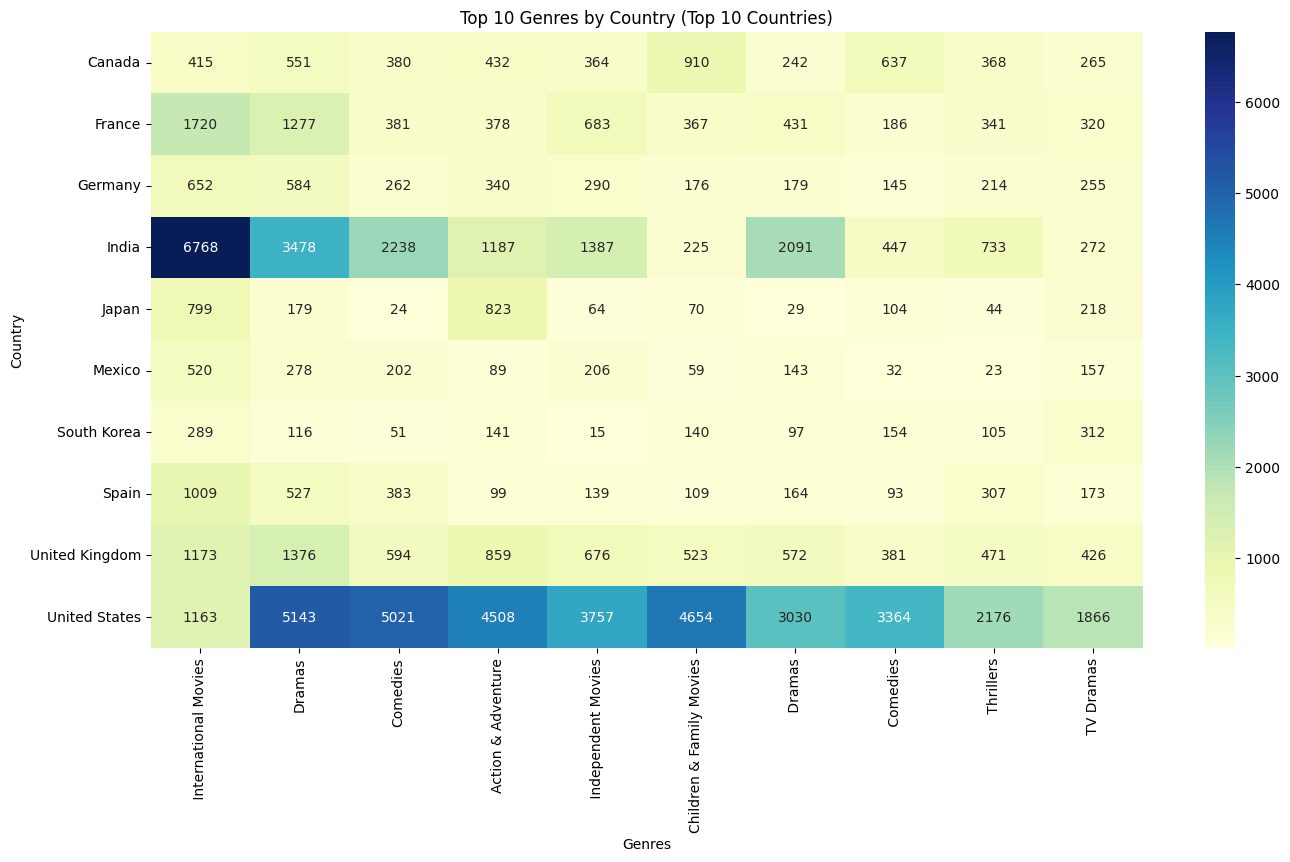

In [305]:
# content(genres) is available in different countries

# Select the top 10 countries with the most content (excluding "Unknown" country)
top_10_countries = df_fin[df_fin['country'] != 'Unknown country']['country'].value_counts().head(10).index

# Filter the data for the selected countries
filtered_data = df_fin[df_fin['country'].isin(top_10_countries)]

# Create a pivot table to calculate the frequency of genres by country
genre_country = filtered_data.groupby(['country', 'genres']).size().unstack().fillna(0)

# Select the top 10 genres
top_10_genres = genre_country.sum().nlargest(10).index
genre_country_top10 = genre_country[top_10_genres]

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(genre_country_top10, cmap='YlGnBu', annot=True, fmt='g', cbar=True)
plt.title('Top 10 Genres by Country (Top 10 Countries)')
plt.xlabel('Genres')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.show()

**Business insights:**

*   These highlight the genre preferences and strengths of different countries, providing valuable information for content creators, distributors, and viewers.


*   International movies, drama and comedy play a vital business in the top business countries.





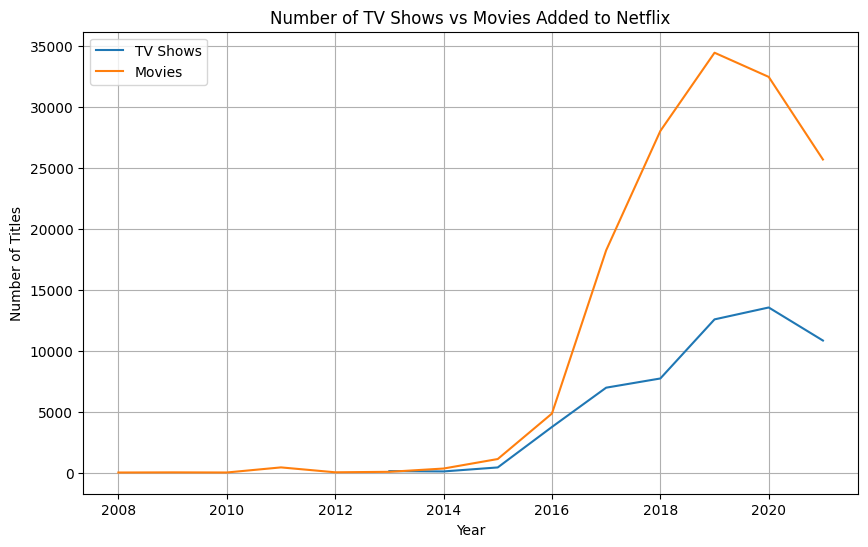

In [306]:
# focus of type attribute in business

# Group the data by 'year_added' and 'type' (TV show or movie)
content_counts = df_fin.groupby(['year_added', 'type']).size().unstack()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(content_counts.index, content_counts['TV Show'], label='TV Shows')
plt.plot(content_counts.index, content_counts['Movie'], label='Movies')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of TV Shows vs Movies Added to Netflix')
plt.legend()
plt.grid(True)
plt.show()


**Business insight:**


*   We can observe that while there was a significant increase in both movies and TV shows added to Netflix in recent years, the growth in TV show additions seems to be more prominent, indicating a relatively stronger focus on TV shows by Netflix in recent years.

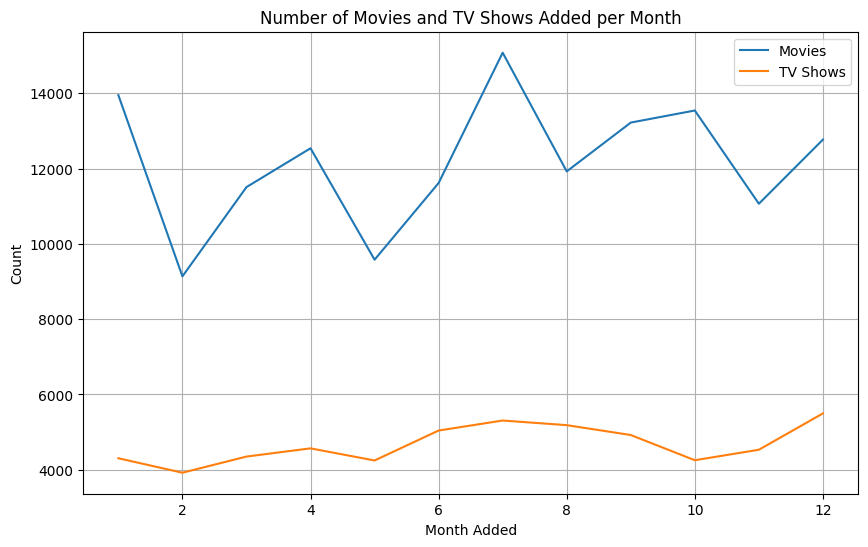

In [307]:
# Best time to launch movies or TV shows

# Convert the 'date_added' column to datetime format if it is not already in datetime format
df_fin['date_added'] = pd.to_datetime(df_fin['date_added'])

# Create a new column 'month_added' to extract the month from the 'date_added' column
df_fin['month_added'] = df_fin['date_added'].dt.month

# Group the data by month_added and calculate the count of movies and TV shows
content_counts = df_fin.groupby('month_added')['type'].value_counts().unstack()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(content_counts.index, content_counts['Movie'], label='Movies')
plt.plot(content_counts.index, content_counts['TV Show'], label='TV Shows')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.title('Number of Movies and TV Shows Added per Month')
plt.legend()
plt.grid(True)
plt.show()


**Business insights:**

*   TV shows tend to have higher counts in the months of July, August, and December. This could indicate that launching a TV show during these months may attract more viewership.

*  Movies, on the other hand, have relatively higher counts in the months of April, July, and December. Launching a movie during these months might result in a larger audience engagement.


*   The months of January and February have relatively lower counts for both movies and TV shows. Launching content during these months might face less competition and have a higher chance of standing out.


*   Launching new content based trends and patterns may take advantage of increased viewer activity and engagement.





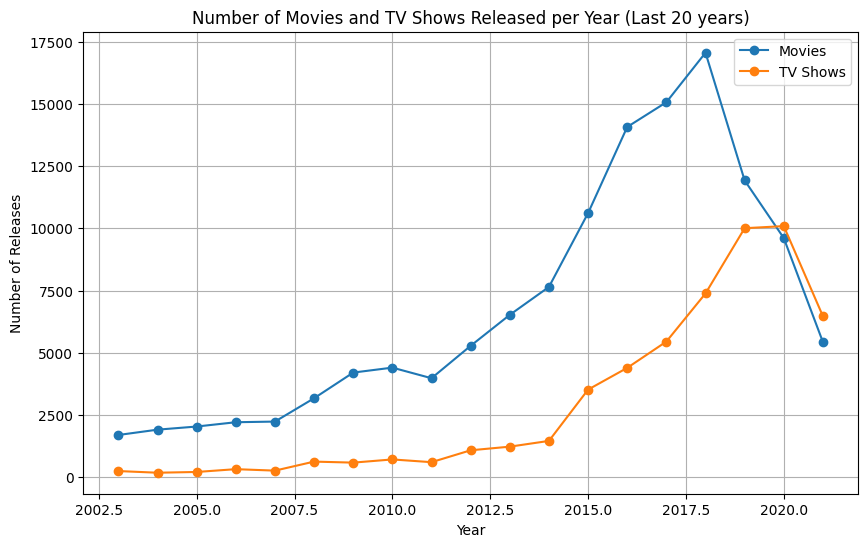

In [309]:
# Filter the data for movies and TV shows separately
movies_data = df_fin[df_fin['type'] == 'Movie']
tv_shows_data = df_fin[df_fin['type'] == 'TV Show']

# Group the data by release year and count the number of movies and TV shows
movies_per_year = movies_data['release_year'].value_counts().sort_index()
tv_shows_per_year = tv_shows_data['release_year'].value_counts().sort_index()

# Filter the data for the last 20 years
current_year = pd.to_datetime('today').year
start_year = current_year - 20
end_year = current_year
movies_per_year = movies_per_year.loc[start_year:end_year]
tv_shows_per_year = tv_shows_per_year.loc[start_year:end_year]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', label='Movies')
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, marker='o', label='TV Shows')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Number of Movies and TV Shows Released per Year (Last 20 years)')
plt.grid(True)
plt.legend()
plt.show()


**Business insights**

*   The number of movies released per year has generally increased over the years, with some fluctuations. There was a significant increase from 2008 to 2018, with the highest number of movies released in 2018. However, there has been a slight decline in the number of movies released in recent years, with a notable drop in 2019 and 2020.


*   In recent years, there has been a higher number of TV shows released compared to movies. This suggests that the streaming platform may have shifted its focus towards producing and releasing more TV shows. This could be due to the popularity and demand for episodic content, binge-watching culture, and the success of TV series in attracting and retaining subscribers.


*   These insights indicate the evolving content strategy of the streaming platform, with a focus on both movies and TV shows. The data suggests that TV shows have gained prominence and have been released in larger numbers compared to movies in recent years. This shift may be driven by changing consumer preferences and the streaming platform's strategy to offer a diverse range of content to cater to a wider audience.






<Figure size 1000x600 with 0 Axes>

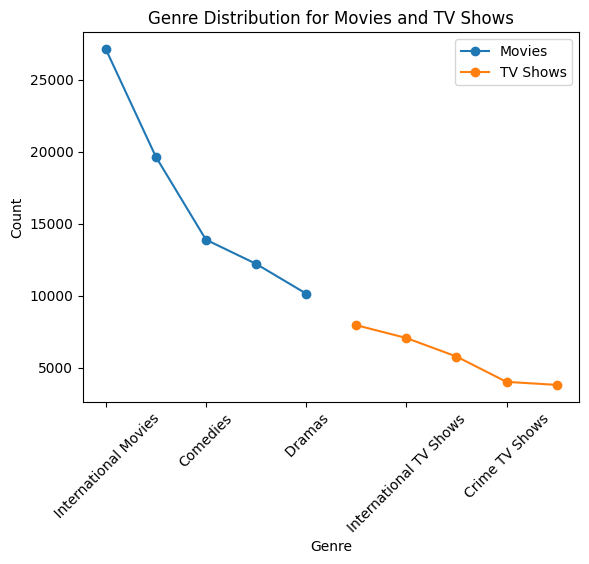

In [310]:
# type of shows to produce

# Filter the data for movies
movies_data = df_fin[df_fin['type'] == 'Movie']

# Group the movie data by genre and count the occurrences
movie_genre_counts = movies_data['genres'].value_counts()

# Select the top genres for movies
top_movie_genres = movie_genre_counts.head(5).index

# Filter the movie data for the top genres
top_movie_genre_data = movies_data[movies_data['genres'].isin(top_movie_genres)]

# Group the movie data by genre and count the occurrences
movie_genre_counts = top_movie_genre_data['genres'].value_counts()

# Filter the data for TV shows
tv_shows_data = df_fin[df_fin['type'] == 'TV Show']

# Group the TV show data by genre and count the occurrences
tv_show_genre_counts = tv_shows_data['genres'].value_counts()

# Select the top genres for TV shows
top_tv_show_genres = tv_show_genre_counts.head(5).index

# Filter the TV show data for the top genres
top_tv_show_genre_data = tv_shows_data[tv_shows_data['genres'].isin(top_tv_show_genres)]

# Group the TV show data by genre and count the occurrences
tv_show_genre_counts = top_tv_show_genre_data['genres'].value_counts()

# Combine the genre counts for movies and TV shows into a single DataFrame
combined_genre_counts = pd.concat([movie_genre_counts, tv_show_genre_counts], axis=1)
combined_genre_counts.columns = ['Movies', 'TV Shows']

# Plot the genre distribution for movies and TV shows
plt.figure(figsize=(10, 6))
combined_genre_counts.plot(kind='line', marker='o')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution for Movies and TV Shows')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Business insight:**

*   The company can consider producing more content in the top genres, which are International Movies, Dramas, Comedies, Action & Adventure for movies, and TV Dramas, International TV Shows, and Crime TV Shows for TV shows. These genres have shown high demand and popularity among viewers. Additionally, the company can explore producing more content targeted at specific age groups, such as Kids' TV shows.

## **Recommendation**


*   Diversifying the content offering may be an important strategy, according to an examination of the genres and content that are available in various nations. To appeal to a larger audience, this may entail investing in a variety of genres, including those that are popular in certain locales. The business can look into joint ventures and collaborations to purchase or create content that fits the tastes of various target markets.

*   Collaborate with established talent


*   Focus on original content




*   According to the data, there has been a steady rise in the number of TV series released each year, especially in recent years. This suggests that there is a rising demand among viewers for TV shows. The business should think about devoting more money to creating and producing top-notch TV programmes in order to capitalise on this trend. This can assist in bringing in and keeping subscribers that are interested in episodic material.
*  Although there have been fluctuations in the annual amount of films released, there has been a minor drop in recent years. It is crucial for the business to examine the fundamental causes of this drop. It is important to carefully consider factors including shifting consumer tastes, market saturation, and changes in the way people consume material. The corporation can decide on its acquisition and movie production plans based on this analysis.

